In [20]:
#----------- Part-1: Create Data Frame
#----------- Part-2: Create Feature Columns & Target Column
#----------- Part-3: Train Models
#----------- Part-4: Fit, Predict, Score

#----------- Other Questions

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, date, timedelta
import warnings
warnings.filterwarnings('ignore')

with open('hourly_data.json','rb') as f:
    data=f.readlines()
hourly_data = json.loads(data[0])

In [37]:
# for key in hourly_data.items():
#     print key
# (u'2015-12-06', [45, 43, 40, 40, 40, 38, 39, 43, 61, 84, 120, 139, 143, 114, 84, 82, 73, 69, 63, 55, 51, 49, 47, 42])

In [2]:
#----------- Part-1: Create Data Frame
#
#----------- Year-Week#-Weekday-Date-Hour-#_of_parking
#


# Date-Hour-Count
# [(u'2014-06-30', 0, 43), (u'2014-06-30', 1, 41),..]
raw_data = []
for key,value in hourly_data.items():
    for i in range(24):
        raw_data.append((key,i,value[i]))

data_df = pd.DataFrame(raw_data, columns=['Date','Hour','#_of_parking'])


#        Year  Week#  Weekday
# 0      2014     27        1
# Decompose Date to Year, Week# & Weekday
pk_df = pd.DataFrame(map(lambda x: x.isocalendar(), pd.to_datetime(data_df['Date'])), columns=['Year','Week#','Weekday'])

  
# len(pk_df)=27768
pk_df['Date']=data_df['Date']
pk_df['Hour']=data_df['Hour']
pk_df['#_of_parking']=data_df['#_of_parking']
            

# len(use_data_df)=18264
# Based on 'Basic_Static.ipynb: part-7' Ignore data of year 2012 & 2013
use_data_df = pk_df[(pk_df['Date']>'2013-12-31')]

In [3]:
# print pd.to_datetime(data_df['Date'])[0].isocalendar()
# (2014, 27, 1)
use_data_df.head()

,Year,Week#,Weekday,Date,Hour,#_of_parking
0,2014,27,1,2014-06-30,0,43
1,2014,27,1,2014-06-30,1,41
2,2014,27,1,2014-06-30,2,38
3,2014,27,1,2014-06-30,3,39
4,2014,27,1,2014-06-30,4,58


In [8]:
#----------- Part-2: Create Feature Columns & Target Column
#
#----------- list of features: 53 week, 7 weekday, 24 hour, [3 awd, weekend, holiday, 8 hour period]
#
# ToDo: 
# Holiday list ?
# actural_work_day no 5 ?
# Hour period check ?


lst_feature = []

# Week#
for i in range(53):
    lst_feature += ['w#_'+str(i)]
    use_data_df['w#_'+str(i)] = map(lambda x:1 if x==i else 0 , use_data_df['Week#'])

    
# Weekday#
for i in range(1,8):
    lst_feature += ['d#_'+str(i)]
    use_data_df['d#_'+str(i)] = map(lambda x:1 if x==i else 0, use_data_df['Weekday'])

    
# Actural Work Day & Weekend & Holidays
lst_feature += ['awd','weekend','?holiday']

actural_work_day = [1,2,3,4,5]
weekend = [6,7]
holidays_lst = ['2014-01-01', '2015-01-01', '2016-01-01',
 '2014-05-26', '2015-05-25', '2016-05-30',
 '2014-07-04', '2015-07-03', '2015-07-04', '2016-07-04',
 '2014-09-01', '2015-09-07', '2015-09-05',
 '2014-11-27', '2014-11-28', '2015-11-26', '2015-11-27', '2016-11-24', '2016-11-25',
 '2014-12-25', '2015-12-25', '2015-12-25', '2015-12-26']

use_data_df['awd'] = map(lambda x:1 if x in actural_work_day else 0, use_data_df['Weekday'])
use_data_df['weekend'] = map(lambda x:1 if x in weekend else 0, use_data_df['Weekday'])
use_data_df['?holiday'] = map(lambda x:1 if x in holidays_lst else 0, use_data_df['Date'])


# Hour#
for i in range(24):
    lst_feature += ['h#_'+str(i)]
    use_data_df['h#_'+str(i)] = map(lambda x:1 if x==i else 0, use_data_df['Hour'])

    
# Hour_Period
lst_feature += ['h_0_5_21_24','h_5_7','h_7_19','h_19_21','h_0_6','h_6_12','h_12_18','h_18_24']

rh1 = range(0,5)+range(21,24)
use_data_df['h_0_5_21_24'] = map(lambda x:1 if x in rh1 else 0, use_data_df['Hour'])
use_data_df['h_5_7'] = map(lambda x:1 if x in range(5,7) else 0, use_data_df['Hour'])
use_data_df['h_7_19'] = map(lambda x:1 if x in range(7,19) else 0, use_data_df['Hour'])   
use_data_df['h_19_21'] = map(lambda x:1 if x in range(19,21) else 0, use_data_df['Hour'])

use_data_df['h_0_6'] = map(lambda x:1 if x in range(0,6) else 0, use_data_df['Hour'])
use_data_df['h_6_12'] = map(lambda x:1 if x in range(6,12) else 0, use_data_df['Hour'])
use_data_df['h_12_18'] = map(lambda x:1 if x in range(12,18) else 0, use_data_df['Hour'])   
use_data_df['h_18_24'] = map(lambda x:1 if x in range(18,24) else 0, use_data_df['Hour'])
    
# len(lst_feature)=95
use_data_df.head()

,Year,Week#,Weekday,Date,Hour,#_of_parking,w#_0,w#_1,w#_2,w#_3,...,h#_22,h#_23,h_0_5_21_24,h_5_7,h_7_19,h_19_21,h_0_6,h_6_12,h_12_18,h_18_24
0,2014,27,1,2014-06-30,0,43,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2014,27,1,2014-06-30,1,41,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2014,27,1,2014-06-30,2,38,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2014,27,1,2014-06-30,3,39,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2014,27,1,2014-06-30,4,58,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [9]:
X_all = use_data_df[lst_feature]
y_all = use_data_df['#_of_parking']

In [13]:
#----------- Part-3: Train Models
#

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV


In [22]:
(X_train, X_test, y_train, y_test) = train_test_split(X_all, y_all, test_size=0.1)
print len(X_train), len(X_test)

16437 1827


Regression Score: 0.732792114418


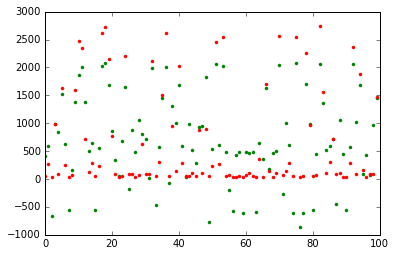

In [83]:
#----------- LinearRegression

#-- 1st Try: All Data
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_lreg = reg_linear.predict(X_test)

print "Regression Score: {}".format(reg_linear.score(X_all, y_all))

#-- Visulize y_predict & y_test
t = np.arange(0,100,1)
plt.plot(t,y_lreg.tolist()[:100],'g.',t,y_test.tolist()[:100],'r.')
plt.show()

Linear Regression Score: 0.734368288591
r2 Score: 0.655246465297


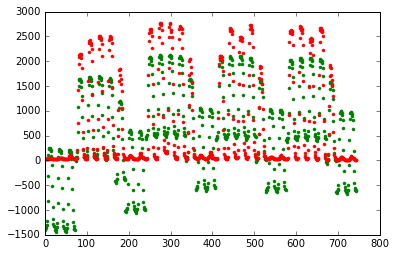

In [89]:
#-- 2nd Try: Not Consider 2016

# Test Data
# len(data_16jan)=744
data_16jan = use_data_df[use_data_df['Date']>'2015-12-31'].sort(['Date','Hour'])
X_16jan = data_16jan[lst_feature]
y_16jan = data_16jan['#_of_parking']

# Train Data
data_train_new = use_data_df[use_data_df['Date']<'2016-01-01']
X_all_new = data_train_new[lst_feature]
y_all_new = data_train_new['#_of_parking']

# Model Training
final_lreg = LinearRegression()
final_lreg.fit(X_all_new, y_all_new)

# Predict
y_lreg_new = final_lreg.predict(X_16jan)

# Score
lscore = final_lreg.score(X_all_new, y_all_new)
print "Linear Regression Score: {}".format(lscore)

from sklearn.metrics import r2_score
r2score = r2_score(y_16jan.tolist(), y_lreg_new.tolist())
print "r2 Score: {}".format(r2score)

t = np.arange(0,744,1)
plt.plot(t, y_lreg_new.tolist(), 'g.', t, y_16jan.tolist(), 'r.')
plt.show()

In [64]:
y_lreg_new[:5]

array([-1368., -1396., -1356., -1328., -1312.])

In [61]:
y_16jan.head()

2688    40
2689    38
2690    36
2691    35
2692    35
Name: #_of_parking, dtype: int64

Regression Score: 0.755425233174
r2 Score: 0.902961460825
RMSE: 302.819730632


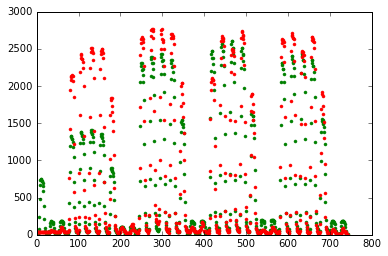

In [91]:
#-- 3rd Try: SGDRegressor

from sklearn.linear_model import SGDRegressor
import math
y_all_new_log = map(lambda x:math.log(x), y_all_new)

# Model Training
lg_reg = SGDRegressor(loss='epsilon_insensitive', penalty='l1', epsilon=0.01)
lg_reg.fit(X_all_new, y_all_new_log)

# Predict
y_lgreg = lg_reg.predict(X_16jan)
y_16jan_lgreg = map(lambda x:math.exp(x), y_lgreg.tolist())

# Score
lgscore = lg_reg.score(X_all_new, y_all_new_log)
print "Regression Score: {}".format(lgscore)

lgr2score = r2_score(y_16jan, y_16jan_lgreg)
print "r2 Score: {}".format(lgr2score)

RMSE = mean_squared_error(y_16jan, y_16jan_lgreg)**0.5
print "RMSE: {}".format(RMSE)

t = np.arange(0,744,1)
plt.plot(t, y_16jan_lgreg, 'g.', t, y_16jan.tolist(), 'r.')
plt.show()

In [99]:
#----------- Result

result = {}
result['16_Jan_True'] = y_16jan.tolist()
result['16_Jan_Predict'] = y_16jan_lgreg
# result

In [98]:
#----------- Generate Json File

with open('201601.json','w') as fp:
    json.dump(result, fp)